In [21]:
!ls ./data | sort

busstops_norway.csv
grunnkrets_age_distribution.csv
grunnkrets_households_num_persons.csv
grunnkrets_income_households.csv
grunnkrets_norway_stripped.csv
plaace_hierarchy.csv
sample_submission.csv
stores_extra.csv
stores_test.csv
stores_train.csv


## Libraries

In [141]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Settings

In [142]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
plt.figure(figsize=(9, 7))
plt.style.use('bmh')

<Figure size 648x504 with 0 Axes>

## Import Files

In [143]:
stores_train = pd.read_csv('data/stores_train.csv')
stores_test = pd.read_csv('data/stores_test.csv')
stores_extra = pd.read_csv('data/stores_extra.csv')
plaace_hierarchy = pd.read_csv('data/plaace_hierarchy.csv')
grunnkrets = pd.read_csv('data/grunnkrets_norway_stripped.csv')
grunnkrets_ages = pd.read_csv('data/grunnkrets_age_distribution.csv')
grunnkrets_household_types = pd.read_csv('data/grunnkrets_households_num_persons.csv')
grunnkrets_household_income = pd.read_csv('data/grunnkrets_income_households.csv')
busstops = pd.read_csv('data/busstops_norway.csv')

## RMSLE Function

In [144]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error 
    
    Args:
        y_true (np.array): n-dimensional vector of ground-truth values 
        y_pred (np.array): n-dimensional vecotr of predicted values 
    
    Returns:
        A scalar float with the rmsle value 
    
    Note: You can alternatively use sklearn and just do: 
        `sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5`
    """
    assert (y_true >= 0).all(), 'Received negative y_true values'
    assert (y_pred >= 0).all(), 'Received negative y_pred values'
    assert y_true.shape == y_pred.shape, 'y_true and y_pred have different shapes'
    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)
    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)
    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))

# Merging all the Datasets

## Merging plaace_hierarchy with Stores data

In [145]:
# Augment stores_train with information about the hierarchy
stores_with_hierarchy = stores_train.merge(plaace_hierarchy, how='left', on='plaace_hierarchy_id')
stores_with_hierarchy_test = stores_test.merge(plaace_hierarchy, how='left', on='plaace_hierarchy_id')

# Show dataframe, but transposed so that we can more easily see all the resulting columns
stores_with_hierarchy.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants


## Merging Grunnkrets with Stores data

In [146]:
grunnkrets_2016 = grunnkrets.loc[grunnkrets['year'] == 2016]
stores_with_hierarchy_grunnkrets = pd.merge(stores_with_hierarchy, grunnkrets_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_test = pd.merge(stores_with_hierarchy_test, grunnkrets_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_test


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2
0,914206820-914239427-717245,2016,VÅLERENGA HALAL BURGER AS,1.1.1.0,Hamburger restaurants,3012704,STRØMSVEIEN 25 A,59.908672,10.787031,NaN,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Vålerenga rode 4,Vålerenga,Oslo,"POLYGON((10.7867135984557 59.908762574244, 10....",0.057027
1,916789157-916823770-824309,2016,BURGER KING MYREN,1.1.1.0,Hamburger restaurants,8061401,MYREN 1,59.201467,9.588243,BURGER KING,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Kjempa,Gulset,Skien,MULTIPOLYGON(((9.57990302232997 59.20175739826...,0.165993
2,913341082-977479363-2948,2016,BURGER KING STOVNER,1.1.1.0,Hamburger restaurants,3013917,STOVNER SENTER 3,59.962146,10.924524,BURGER KING,Stovner Senter,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Stovner senter,Fossum,Oslo,"POLYGON((10.9327714172545 59.9614144471754, 10...",0.236628
3,889682582-889697172-28720,2016,BURGER KING TUNGASLETTA,1.1.1.0,Hamburger restaurants,16012104,TUNGASLETTA 16,63.420785,10.461091,BURGER KING,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Strindheim 4,Strindheim,Trondheim,"POLYGON((10.459001199372 63.424320840557, 10.4...",0.983436
4,997991699-998006945-417222,2016,VULKAN BURGERBAR,1.1.1.0,Hamburger restaurants,3014305,AUD SCHØNEMANNS VEI 15,59.921102,10.785123,VULKAN BURGERBAR,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Lille Tøyen,Hasle,Oslo,"POLYGON((10.7815720596407 59.9175770831722, 10...",0.449502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,917323003-917383529-844309,2016,GULATING HAUGESUND,2.8.11.2,Beer and soda shop,11490601,BRÅTAVEGEN 30,59.259575,5.325813,GULATING GRUPPEN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Stokkastrand,Kopervik,Karmøy,MULTIPOLYGON(((5.32136787489711 59.23099432230...,1.708924
8573,917353379-917411824-845904,2016,STAVANGER BEER AS,2.8.11.2,Beer and soda shop,11030901,SANDVIGÅ 7,58.976219,5.721546,NaN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Bjergsted,Kampen,Stavanger,"POLYGON((5.72714116927016 58.9724047824004, 5....",0.310575
8574,917072302-917089248-833647,2016,GULATING ØLUTSALG OG PUB,2.8.11.2,Beer and soda shop,2270103,GARDERBAKKEN 6,59.928330,11.163202,GULATING GRUPPEN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Fetsund,Hovinhøgda,Fet,"POLYGON((11.1631232250592 59.9379356074191, 11...",1.627789
8575,916960557-916993161-829908,2016,VI BRYGGER BUTIKKDRIFT AS,2.8.11.2,Beer and soda shop,12470701,RAVNANGERVEGEN,60.445790,5.161587,NaN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Haugland,Haugland/Davanger/Ramsøy,Askøy,MULTIPOLYGON(((5.18520140772538 60.44242290291...,1.103012


In [147]:
grunnkrets_ages
grunnkrets_ages_2016 = grunnkrets_ages.loc[grunnkrets_ages['year'] == 2016]
stores_with_hierarchy_grunnkrets_age = pd.merge(stores_with_hierarchy_grunnkrets, grunnkrets_ages_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age_test = pd.merge(stores_with_hierarchy_grunnkrets_test, grunnkrets_ages_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age

# Feature engineering: Age binning
# under_18 = grunnkrets_ages.loc[: , "age_0":"age_18"]
# above_18 = grunnkrets_ages.loc[: , "age_19":"age_90"]
# grunnkrets_ages['0_to_18'] = under_18.sum(axis = 1)
# grunnkrets_ages['19_to_90'] = above_18.sum(axis = 1)
# grunnkrets_ages = grunnkrets_ages.drop(grunnkrets_ages.iloc[:, 2:93],axis = 1) # drop age columns

# grunnkrets_ages_2016 = grunnkrets_ages.loc[grunnkrets_ages['year'] == 2016]
# stores_with_hierarchy_grunnkrets_age = pd.merge(stores_with_hierarchy_grunnkrets, grunnkrets_ages_2016, how='left', on='grunnkrets_id')
# stores_with_hierarchy_grunnkrets_age_test = pd.merge(stores_with_hierarchy_grunnkrets_test, grunnkrets_ages_2016, how='left', on='grunnkrets_id')
# stores_with_hierarchy_grunnkrets_age['0_to_18'] = stores_with_hierarchy_grunnkrets_age['0_to_18'].fillna((stores_with_hierarchy_grunnkrets_age['0_to_18'].mean()))
# stores_with_hierarchy_grunnkrets_age['19_to_90'] = stores_with_hierarchy_grunnkrets_age['19_to_90'].fillna((stores_with_hierarchy_grunnkrets_age['19_to_90'].mean()))


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year,0_to_18,19_to_90
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,25.000000,132.000000
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,143.178518,622.172205
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,67.000000,305.000000
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,46.000000,428.000000
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,"POLYGON((10.3709720705149 63.3579302939404, 10...",0.251070,NaN,143.178518,622.172205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,915789943-915806929-781991,2016,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,NaN,0.088,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Sentrum,Sentrum,Horten,"POLYGON((10.4844343691104 59.4185964815712, 10...",0.291337,2016.0,194.000000,1322.000000
12855,917921733-917982368-868081,2016,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5020406,NaN,60.799991,10.693635,GULATING GRUPPEN,CC Gjøvik,1.816,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Sentrum 6,Sentrum,Gjøvik,"POLYGON((10.6971768573538 60.7988198867219, 10...",0.137188,2016.0,42.000000,461.000000
12856,911721961-911764474-496764,2016,GULATING ØLUTSALG STRØMMEN,2.8.11.2,Beer and soda shop,2310803,STØPERIVEIEN 6,59.946562,11.007659,GULATING GRUPPEN,Strømmen Storsenter,38.225,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Stalsberg 3,Stalsberg,Skedsmo,"POLYGON((11.0040997448376 59.9483583629928, 11...",0.123431,2016.0,145.000000,972.000000
12857,914337046-914343372-721294,2016,DET GODE BRYGG,2.8.11.2,Beer and soda shop,11020113,VÅGSGATA 16,58.850261,5.735674,NaN,Bystasjonen,3.642,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Vågsgate,Sentrum,Sandnes,"POLYGON((5.7342552469665 58.8492193600012, 5.7...",0.034857,2016.0,22.000000,259.000000


In [148]:
grunnkrets_household_types
grunnkrets_household_types_2016 = grunnkrets_household_types.loc[grunnkrets_household_types['year'] == 2016]
stores_with_hierarchy_grunnkrets_age_hhtypes = pd.merge(stores_with_hierarchy_grunnkrets_age, grunnkrets_household_types_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age_hhtypes_test = pd.merge(stores_with_hierarchy_grunnkrets_age_test, grunnkrets_household_types_2016, how='left', on='grunnkrets_id')

stores_with_hierarchy_grunnkrets_age_hhtypes


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year_x,0_to_18,19_to_90,year_y,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,25.000000,132.000000,2016.0,20.0,0.0,8.0,28.0,4.0,6.0,11.0,75.0
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,143.178518,622.172205,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,67.000000,305.000000,2016.0,45.0,9.0,38.0,84.0,13.0,6.0,12.0,150.0
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,46.000000,428.000000,2016.0,41.0,10.0,27.0,126.0,11.0,8.0,15.0,254.0
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,"POLYGON((10.3709720705149 63.3579302939404, 10...",0.251070,NaN,143.178518,622.172205,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,915789943-915806929-781991,2016,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,NaN,0.088,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Sentrum,Sentrum,Horten,"POLYGON((10.4844343691104 59.4185964815712, 10...",0.291337,2016.0,194.000000,1322.000000,2016.0,159.0,53.0,113.0,488.0,46.0,36.0,58.0,556.0
12855,917921733-917982368-868081,2016,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5020406,NaN,60.799991,10.693635,GULATING GRUPPEN,CC Gjøvik,1.816,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Sentrum 6,Sentrum,Gjøvik,"POLYGON((10.6971768573538 60.7988198867219, 10...",0.137188,2016.0,42.000000,461.000000,2016.0,47.0,9.0,14.0,138.0,5.0,7.0,19.0,256.0
12856,911721961-911764474-496764,2016,GULATING ØLUTSALG STRØMMEN,2.8.11.2,Beer and soda shop,2310803,STØPERIVEIEN 6,59.946562,11.007659,GULATING GRUPPEN,Strømmen Storsenter,38.225,Beer and sod

In [149]:
grunnkrets_household_income
grunnkrets_household_income_2016 = grunnkrets_household_income.loc[grunnkrets_household_income['year'] == 2016]
stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome = pd.merge(stores_with_hierarchy_grunnkrets_age_hhtypes, grunnkrets_household_income_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome_test = pd.merge(stores_with_hierarchy_grunnkrets_age_hhtypes_test, grunnkrets_household_income_2016, how='left', on='grunnkrets_id')

stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year_x,0_to_18,19_to_90,year_y,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children_x,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles_x,year,all_households,singles_y,couple_without_children_y,couple_with_children,other_households,single_parent_with_children
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,25.000000,132.000000,2016.0,20.0,0.0,8.0,28.0,4.0,6.0,11.0,75.0,2016.0,398700.0,277500.0,669100.0,832800.0,679600.0,349500.0
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,143.178518,622.172205,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2016.0,374800.0,295000.0,679600.0,802200.0,604100.0,397700.0
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,67.000000,305.000000,2016.0,45.0,9.0,38.0,84.0,13.0,6.0,12.0,150.0,2016.0,347900.0,251900.0,589900.0,673100.0,637600.0,327000.0
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,46.000000,428.000000,2016.0,41.0,10.0,27.0,126.0,11.0,8.0,15.0,254.0,2016.0,394000.0,293600.0,602000.0,675800.0,699600.0,335200.0
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,"POLYGON((10.3709720705149 63.3579302939404, 10...",0.251070,NaN,143.178518,622.172205,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2016.0,623700.0,296500.0,635700.0,779700.0,801300.0,413600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,915789943-915806929-781991,2016,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,NaN,0.088,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Sentrum,Sentrum,Horten,"POLYGON((10.4844343691104 59.4185964815712, 10...",0.291337,2016.0,194.000000,1322.000000,2016.0,159.0,53.0,113.0,488.0,46.0,36.0,58.0,556.0,2016.0,381900.0,263600.0,563700.0,682000.0,636800.0,382100.0
12855,917921733-917982368-868081,2016,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5

In [150]:
stores_train_merged = stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome
stores_test_merged = stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome_test
stores_train_merged

,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year_x,0_to_18,19_to_90,year_y,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children_x,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles_x,year,all_households,singles_y,couple_without_children_y,couple_with_children,other_households,single_parent_with_children
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,25.000000,132.000000,2016.0,20.0,0.0,8.0,28.0,4.0,6.0,11.0,75.0,2016.0,398700.0,277500.0,669100.0,832800.0,679600.0,349500.0
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,143.178518,622.172205,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2016.0,374800.0,295000.0,679600.0,802200.0,604100.0,397700.0
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,67.000000,305.000000,2016.0,45.0,9.0,38.0,84.0,13.0,6.0,12.0,150.0,2016.0,347900.0,251900.0,589900.0,673100.0,637600.0,327000.0
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,46.000000,428.000000,2016.0,41.0,10.0,27.0,126.0,11.0,8.0,15.0,254.0,2016.0,394000.0,293600.0,602000.0,675800.0,699600.0,335200.0
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,"POLYGON((10.3709720705149 63.3579302939404, 10...",0.251070,NaN,143.178518,622.172205,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2016.0,623700.0,296500.0,635700.0,779700.0,801300.0,413600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,915789943-915806929-781991,2016,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,NaN,0.088,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Sentrum,Sentrum,Horten,"POLYGON((10.4844343691104 59.4185964815712, 10...",0.291337,2016.0,194.000000,1322.000000,2016.0,159.0,53.0,113.0,488.0,46.0,36.0,58.0,556.0,2016.0,381900.0,263600.0,563700.0,682000.0,636800.0,382100.0
12855,917921733-917982368-868081,2016,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5

# Exploratory Data Analysis

In [151]:
df = stores_train_merged

In [152]:
# s = df.pop('revenue')
new_df = pd.concat([df, s], 1)


### Seperate the data set into numerical and categorical data

In [153]:
df_numerical_features = new_df.select_dtypes(exclude='object')
df_categorical_features = new_df.select_dtypes(include='object')

In [154]:
df = new_df

## Distribution of Revenue

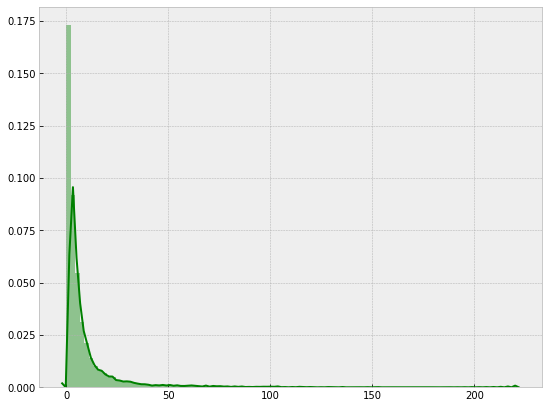

In [155]:
plt.figure(figsize=(9, 7))
sns.distplot(df['revenue'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Numerical Data Distribution

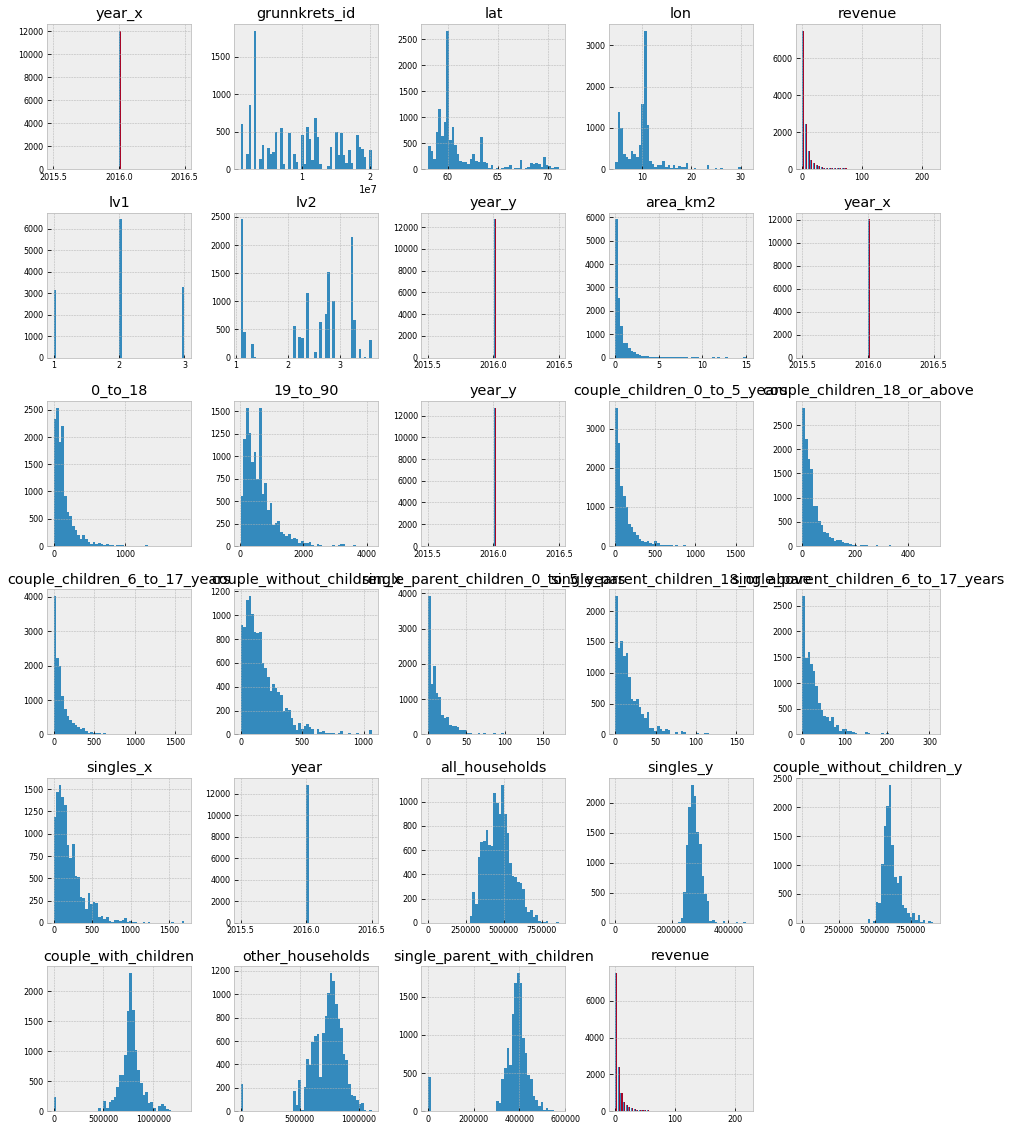

In [156]:
df_numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

## Correlation with Revenue

In [39]:
df_num_corr = df_numerical_features.corr()['revenue'][:-1] # -1 because the latest row is SalePrice
df_num_corr
golden_features_list = df_num_corr[abs(df_num_corr) > 0.02].sort_values(ascending=False)
print("The top {} correlated values with revenue are:\n{}".format(len(golden_features_list), golden_features_list))

TypeError: sort_values() missing 1 required positional argument: 'by'

# Feature Engineering

## 1. Dropping Redundant Columns

In [157]:
stores_train_finalcols = stores_train_merged.drop(columns=[
    'year_x', 'store_name', 'plaace_hierarchy_id', 'grunnkrets_id', 'address', 'lv1', 'lv2', 'lv3', 'lv4', 'year_y',
    'grunnkrets_name', 'district_name', 'geometry'])

stores_test_finalcols = stores_test_merged.drop(columns=[
    'year_x', 'store_name', 'plaace_hierarchy_id', 'grunnkrets_id', 'address', 'lv1', 'lv2', 'lv3', 'lv4', 'year_y',
    'grunnkrets_name', 'district_name', 'geometry'])

In [158]:
stores_train_finalcols.dtypes

store_id                        object
sales_channel_name_x            object
lat                            float64
lon                            float64
chain_name                      object
                                ...   
singles_y                      float64
couple_without_children_y      float64
couple_with_children           float64
other_households               float64
single_parent_with_children    float64
Length: 31, dtype: object

## 2. One Hot Encoding

In [159]:
#categorical data
categorical_cols = ['sales_channel_name_x', 'chain_name', 'municipality_name', 'sales_channel_name_y', 'lv1_desc',
'lv2_desc', 'lv3_desc', 'lv4_desc','mall_name'] 

df_res = stores_train_finalcols.append(stores_test_finalcols)

#import pandas as pd
df_res_onehot = pd.get_dummies(df_res, columns = categorical_cols)
stores_train_finalcols_onehot = df_res_onehot.iloc[:12859]
stores_test_finalcols_onehot = df_res_onehot.iloc[12859:]


## 3. Handling Outliers

In [161]:
#Dropping the outlier rows with Percentiles
upper_lim = stores_train_finalcols_onehot['revenue'].quantile(.95)
lower_lim = stores_train_finalcols_onehot['revenue'].quantile(.05)

stores_train_finalcols_onehot = stores_train_finalcols_onehot[(stores_train_finalcols_onehot['revenue'] < upper_lim) & (stores_train_finalcols_onehot['revenue'] > lower_lim)]
X_train = stores_train_finalcols_onehot.drop(columns=['revenue', 'store_id'])
y_train = stores_train_finalcols_onehot.revenue 
stores_test_finalcols_onehot
X_test = stores_test_finalcols_onehot.drop(columns=['store_id','revenue'])

# Added internal split
from sklearn.model_selection import train_test_split
X_training, X_testing, y_training, y_testing = train_test_split(X_train, y_train, train_size=0.9, random_state=123)
X_training


lat        lon  area_km2     0_to_18     19_to_90  \
9099   59.731504  10.213350  0.147120  143.178518   622.172205   
7971   59.552248  11.324534  0.285851   50.000000   338.000000   
7772   63.430103   8.032632  4.732697   30.000000    69.000000   
7467   59.458086  10.802944  1.877063   79.000000   306.000000   
684    60.389127   5.323066  0.042770   32.000000   508.000000   
...          ...        ...       ...         ...          ...   
10936  59.913948  10.747912  0.200444   13.000000   126.000000   
8782   59.955446  11.045670  0.198310   58.000000   711.000000   
5640   58.130267   7.051261  5.546325  759.000000  2077.000000   
1436   59.948870  10.768207  0.430545  361.000000  2457.000000   
3838   58.968725   5.750772  0.114703  171.000000   740.000000   

       couple_children_0_to_5_years  couple_children_18_or_above  \
9099                            NaN                          NaN   
7971                           27.0                         18.0   
7772                           18.0                          0.0   
7467                           59.0                         32.0   
684                            39.0                         13.0   
...                             ...                          ...   
10936                          17.0                          0.0   
8782                           42.0                         53.0   
5640                          524.0                        146.0   
1436                          515.0                         52.0   
3838                          220.0                         37.0   

       couple_children_6_to_17_years  couple_without_children_x  \
9099                             NaN                        NaN   
7971                            55.0                       82.0   
7772                            40.0                       22.0   
7467                           106.0                      122.0   
684                             27.0                      144.0   
...                              ...                        ...   
10936                            0.0                       14.0   
8782                            45.0                      314.0   
5640                           641.0                      626.0   
1436                           174.0                      804.0   
3838                            66.0                      210.0   

       single_parent_children_0_to_5_years  \
9099                                   NaN   
7971                                   5.0   
7772                                   0.0   
7467                                   0.0   
684                                    0.0   
...                                    ...   
10936                                  7.0   
8782                                   0.0   
5640                                  88.0   
1436                                  35.0   
3838                                  13.0   

       single_parent_children_18_or_above  \
9099                                  NaN   
7971                                  9.0   
7772                                  0.0   
7467                                  6.0   
684                                   6.0   
...                                   ...   
10936                                 0.0   
8782                                 17.0   
5640                                 76.0   
1436                                 39.0   
3838                                 23.0   

       single_parent_children_6_to_17_years  singles_x    year  \
9099                                    NaN        NaN  2016.0   
7971                                   15.0      174.0  2016.0   
7772                                    7.0       18.0  2016.0   
7467                                   13.0       60.0  2016.0   
684                                     0.0      326.0  2016.0   
...                                     ...        ...     ...   
10936                                   0.

# Models

## Model 1 - catBoost

In [42]:
import catboost as ctb

In [44]:
best_params = {
            'bagging_temperature': 0.5,
            'depth': 8,
            'iterations': 1000,
            'l2_leaf_reg': 25,
            'learning_rate': 0.05,
            'sampling_frequency': 'PerTreeLevel',
            'leaf_estimation_method': 'Gradient',
            'random_strength': 0.8,
            'boosting_type': 'Ordered',
            'feature_border_type': 'MaxLogSum',
            'l2_leaf_reg': 50,
            'max_ctr_complexity': 2,
            'fold_len_multiplier': 2
    }
model = ctb.CatBoostRegressor(**best_params,
                               loss_function='RMSE',
                               eval_metric='AUC',
                               nan_mode='Min',
                               thread_count=8,
                               task_type='CPU',
                               verbose=False)
model.fit(X_train, y_train)

### Parameter Tuning Using GridSearch

In [162]:
from sklearn.model_selection import GridSearchCV

train_dataset = ctb.Pool(X_training, y_training) 
model = ctb.CatBoostRegressor()

#create the grid
grid = {'iterations': [600],
        'learning_rate': [0.1],
        'depth': [6],
        'l2_leaf_reg': [0.5]}
search_results = model.grid_search(grid, train_dataset, cv=5)
print("\nBest Params : ", search_results['params'])

0:	learn: 8.0647061	test: 7.8773853	best: 7.8773853 (0)	total: 12.6ms	remaining: 7.54s
1:	learn: 7.7096617	test: 7.5314207	best: 7.5314207 (1)	total: 22.4ms	remaining: 6.7s
2:	learn: 7.3972834	test: 7.2258450	best: 7.2258450 (2)	total: 32ms	remaining: 6.36s
3:	learn: 7.1238429	test: 6.9499414	best: 6.9499414 (3)	total: 41.9ms	remaining: 6.25s
4:	learn: 6.8728847	test: 6.6990361	best: 6.6990361 (4)	total: 51ms	remaining: 6.07s
5:	learn: 6.6913479	test: 6.5271375	best: 6.5271375 (5)	total: 61ms	remaining: 6.04s
6:	learn: 6.5220479	test: 6.3548249	best: 6.3548249 (6)	total: 69ms	remaining: 5.84s
7:	learn: 6.3787987	test: 6.2190973	best: 6.2190973 (7)	total: 76.9ms	remaining: 5.69s
8:	learn: 6.2490106	test: 6.0893502	best: 6.0893502 (8)	total: 83.7ms	remaining: 5.5s
9:	learn: 6.1388694	test: 5.9882352	best: 5.9882352 (9)	total: 91.1ms	remaining: 5.38s
10:	learn: 6.0443623	test: 5.8942623	best: 5.8942623 (10)	total: 98.4ms	remaining: 5.27s
11:	learn: 5.9548317	test: 5.8159840	best: 5.815984

105:	learn: 4.8063739	test: 4.9088090	best: 4.9088090 (105)	total: 1.07s	remaining: 4.98s
106:	learn: 4.8014822	test: 4.9050936	best: 4.9050936 (106)	total: 1.08s	remaining: 4.99s
107:	learn: 4.7966284	test: 4.9037623	best: 4.9037623 (107)	total: 1.09s	remaining: 4.96s
108:	learn: 4.7921281	test: 4.9008878	best: 4.9008878 (108)	total: 1.1s	remaining: 4.95s
109:	learn: 4.7865105	test: 4.8988353	best: 4.8988353 (109)	total: 1.11s	remaining: 4.95s
110:	learn: 4.7810595	test: 4.8964019	best: 4.8964019 (110)	total: 1.12s	remaining: 4.95s
111:	learn: 4.7758276	test: 4.8941498	best: 4.8941498 (111)	total: 1.14s	remaining: 4.95s
112:	learn: 4.7712191	test: 4.8926754	best: 4.8926754 (112)	total: 1.15s	remaining: 4.96s
113:	learn: 4.7664007	test: 4.8902111	best: 4.8902111 (113)	total: 1.16s	remaining: 4.95s
114:	learn: 4.7631931	test: 4.8904573	best: 4.8902111 (113)	total: 1.17s	remaining: 4.94s
115:	learn: 4.7582424	test: 4.8899038	best: 4.8899038 (115)	total: 1.18s	remaining: 4.93s
116:	learn:

211:	learn: 4.4044577	test: 4.7495183	best: 4.7495183 (211)	total: 2.1s	remaining: 3.84s
212:	learn: 4.4029457	test: 4.7497558	best: 4.7495183 (211)	total: 2.11s	remaining: 3.83s
213:	learn: 4.4009001	test: 4.7495676	best: 4.7495183 (211)	total: 2.12s	remaining: 3.83s
214:	learn: 4.3988878	test: 4.7505765	best: 4.7495183 (211)	total: 2.13s	remaining: 3.82s
215:	learn: 4.3960233	test: 4.7479937	best: 4.7479937 (215)	total: 2.14s	remaining: 3.81s
216:	learn: 4.3940344	test: 4.7477398	best: 4.7477398 (216)	total: 2.15s	remaining: 3.79s
217:	learn: 4.3901389	test: 4.7472165	best: 4.7472165 (217)	total: 2.16s	remaining: 3.78s
218:	learn: 4.3875446	test: 4.7451700	best: 4.7451700 (218)	total: 2.16s	remaining: 3.77s
219:	learn: 4.3851527	test: 4.7453662	best: 4.7451700 (218)	total: 2.17s	remaining: 3.76s
220:	learn: 4.3823731	test: 4.7454359	best: 4.7451700 (218)	total: 2.18s	remaining: 3.74s
221:	learn: 4.3803805	test: 4.7429770	best: 4.7429770 (221)	total: 2.19s	remaining: 3.73s
222:	learn:

305:	learn: 4.1709942	test: 4.7110815	best: 4.7092795 (298)	total: 2.93s	remaining: 2.81s
306:	learn: 4.1699578	test: 4.7111491	best: 4.7092795 (298)	total: 2.94s	remaining: 2.81s
307:	learn: 4.1674684	test: 4.7105419	best: 4.7092795 (298)	total: 2.95s	remaining: 2.8s
308:	learn: 4.1648433	test: 4.7103990	best: 4.7092795 (298)	total: 2.96s	remaining: 2.78s
309:	learn: 4.1628428	test: 4.7108507	best: 4.7092795 (298)	total: 2.96s	remaining: 2.77s
310:	learn: 4.1612479	test: 4.7106891	best: 4.7092795 (298)	total: 2.98s	remaining: 2.77s
311:	learn: 4.1582872	test: 4.7095026	best: 4.7092795 (298)	total: 2.99s	remaining: 2.76s
312:	learn: 4.1563379	test: 4.7089339	best: 4.7089339 (312)	total: 2.99s	remaining: 2.75s
313:	learn: 4.1529604	test: 4.7097477	best: 4.7089339 (312)	total: 3s	remaining: 2.73s
314:	learn: 4.1512830	test: 4.7106598	best: 4.7089339 (312)	total: 3.01s	remaining: 2.72s
315:	learn: 4.1491760	test: 4.7103709	best: 4.7089339 (312)	total: 3.01s	remaining: 2.71s
316:	learn: 4.

402:	learn: 3.9634973	test: 4.7074328	best: 4.7039521 (337)	total: 3.73s	remaining: 1.82s
403:	learn: 3.9614759	test: 4.7077090	best: 4.7039521 (337)	total: 3.74s	remaining: 1.81s
404:	learn: 3.9606167	test: 4.7074924	best: 4.7039521 (337)	total: 3.76s	remaining: 1.81s
405:	learn: 3.9591849	test: 4.7082818	best: 4.7039521 (337)	total: 3.76s	remaining: 1.8s
406:	learn: 3.9572079	test: 4.7083255	best: 4.7039521 (337)	total: 3.77s	remaining: 1.79s
407:	learn: 3.9545096	test: 4.7083938	best: 4.7039521 (337)	total: 3.79s	remaining: 1.78s
408:	learn: 3.9533640	test: 4.7086033	best: 4.7039521 (337)	total: 3.79s	remaining: 1.77s
409:	learn: 3.9500540	test: 4.7083316	best: 4.7039521 (337)	total: 3.8s	remaining: 1.76s
410:	learn: 3.9477765	test: 4.7080351	best: 4.7039521 (337)	total: 3.81s	remaining: 1.75s
411:	learn: 3.9458515	test: 4.7074479	best: 4.7039521 (337)	total: 3.81s	remaining: 1.74s
412:	learn: 3.9434841	test: 4.7060188	best: 4.7039521 (337)	total: 3.82s	remaining: 1.73s
413:	learn: 

501:	learn: 3.7856439	test: 4.7087216	best: 4.7034838 (431)	total: 4.75s	remaining: 927ms
502:	learn: 3.7831959	test: 4.7088689	best: 4.7034838 (431)	total: 4.77s	remaining: 919ms
503:	learn: 3.7826659	test: 4.7090983	best: 4.7034838 (431)	total: 4.78s	remaining: 910ms
504:	learn: 3.7802433	test: 4.7095718	best: 4.7034838 (431)	total: 4.79s	remaining: 902ms
505:	learn: 3.7781525	test: 4.7095263	best: 4.7034838 (431)	total: 4.81s	remaining: 893ms
506:	learn: 3.7766217	test: 4.7103624	best: 4.7034838 (431)	total: 4.82s	remaining: 883ms
507:	learn: 3.7746980	test: 4.7086565	best: 4.7034838 (431)	total: 4.83s	remaining: 874ms
508:	learn: 3.7733635	test: 4.7086595	best: 4.7034838 (431)	total: 4.84s	remaining: 865ms
509:	learn: 3.7720778	test: 4.7079568	best: 4.7034838 (431)	total: 4.85s	remaining: 856ms
510:	learn: 3.7701625	test: 4.7082169	best: 4.7034838 (431)	total: 4.86s	remaining: 847ms
511:	learn: 3.7662285	test: 4.7090244	best: 4.7034838 (431)	total: 4.87s	remaining: 838ms
512:	learn

0:	learn: 8.0278928	test: 8.0426347	best: 8.0426347 (0)	total: 9.74ms	remaining: 5.84s
1:	learn: 7.6674537	test: 7.6852959	best: 7.6852959 (1)	total: 16.9ms	remaining: 5.06s
2:	learn: 7.3810095	test: 7.4002003	best: 7.4002003 (2)	total: 23.6ms	remaining: 4.69s
3:	learn: 7.0998572	test: 7.1270507	best: 7.1270507 (3)	total: 30.9ms	remaining: 4.61s
4:	learn: 6.8547728	test: 6.8942543	best: 6.8942543 (4)	total: 37.3ms	remaining: 4.43s
5:	learn: 6.6392665	test: 6.6789507	best: 6.6789507 (5)	total: 48.2ms	remaining: 4.78s
6:	learn: 6.4750672	test: 6.5206447	best: 6.5206447 (6)	total: 54.7ms	remaining: 4.64s
7:	learn: 6.3220162	test: 6.3775021	best: 6.3775021 (7)	total: 61.7ms	remaining: 4.57s
8:	learn: 6.1954226	test: 6.2609941	best: 6.2609941 (8)	total: 68.7ms	remaining: 4.51s
9:	learn: 6.0812043	test: 6.1486860	best: 6.1486860 (9)	total: 75.8ms	remaining: 4.47s
10:	learn: 5.9866512	test: 6.0603569	best: 6.0603569 (10)	total: 83.1ms	remaining: 4.45s
11:	learn: 5.9092578	test: 5.9982958	best

105:	learn: 4.7391164	test: 5.1424840	best: 5.1418422 (103)	total: 1.33s	remaining: 6.19s
106:	learn: 4.7338337	test: 5.1368780	best: 5.1368780 (106)	total: 1.35s	remaining: 6.21s
107:	learn: 4.7273475	test: 5.1348723	best: 5.1348723 (107)	total: 1.37s	remaining: 6.22s
108:	learn: 4.7221844	test: 5.1341439	best: 5.1341439 (108)	total: 1.43s	remaining: 6.46s
109:	learn: 4.7181519	test: 5.1274975	best: 5.1274975 (109)	total: 1.45s	remaining: 6.46s
110:	learn: 4.7140191	test: 5.1225085	best: 5.1225085 (110)	total: 1.47s	remaining: 6.46s
111:	learn: 4.7076796	test: 5.1222193	best: 5.1222193 (111)	total: 1.48s	remaining: 6.47s
112:	learn: 4.7031121	test: 5.1182323	best: 5.1182323 (112)	total: 1.5s	remaining: 6.46s
113:	learn: 4.6991147	test: 5.1162644	best: 5.1162644 (113)	total: 1.51s	remaining: 6.45s
114:	learn: 4.6943354	test: 5.1127783	best: 5.1127783 (114)	total: 1.53s	remaining: 6.43s
115:	learn: 4.6915700	test: 5.1108373	best: 5.1108373 (115)	total: 1.54s	remaining: 6.44s
116:	learn:

197:	learn: 4.3770308	test: 5.0273769	best: 5.0273769 (197)	total: 2.16s	remaining: 4.38s
198:	learn: 4.3714232	test: 5.0250772	best: 5.0250772 (198)	total: 2.17s	remaining: 4.38s
199:	learn: 4.3686227	test: 5.0254139	best: 5.0250772 (198)	total: 2.18s	remaining: 4.36s
200:	learn: 4.3643668	test: 5.0254288	best: 5.0250772 (198)	total: 2.19s	remaining: 4.34s
201:	learn: 4.3607830	test: 5.0255590	best: 5.0250772 (198)	total: 2.19s	remaining: 4.32s
202:	learn: 4.3580437	test: 5.0238052	best: 5.0238052 (202)	total: 2.2s	remaining: 4.3s
203:	learn: 4.3546438	test: 5.0237339	best: 5.0237339 (203)	total: 2.21s	remaining: 4.29s
204:	learn: 4.3528723	test: 5.0184836	best: 5.0184836 (204)	total: 2.22s	remaining: 4.28s
205:	learn: 4.3487958	test: 5.0183130	best: 5.0183130 (205)	total: 2.23s	remaining: 4.26s
206:	learn: 4.3453233	test: 5.0171486	best: 5.0171486 (206)	total: 2.23s	remaining: 4.24s
207:	learn: 4.3421167	test: 5.0165320	best: 5.0165320 (207)	total: 2.24s	remaining: 4.23s
208:	learn: 

299:	learn: 4.0900366	test: 4.9868911	best: 4.9842174 (292)	total: 2.99s	remaining: 2.99s
300:	learn: 4.0889355	test: 4.9857659	best: 4.9842174 (292)	total: 3s	remaining: 2.99s
301:	learn: 4.0870516	test: 4.9812874	best: 4.9812874 (301)	total: 3.01s	remaining: 2.97s
302:	learn: 4.0861327	test: 4.9813880	best: 4.9812874 (301)	total: 3.02s	remaining: 2.96s
303:	learn: 4.0823156	test: 4.9833724	best: 4.9812874 (301)	total: 3.03s	remaining: 2.95s
304:	learn: 4.0781060	test: 4.9808763	best: 4.9808763 (304)	total: 3.03s	remaining: 2.93s
305:	learn: 4.0749846	test: 4.9794567	best: 4.9794567 (305)	total: 3.04s	remaining: 2.92s
306:	learn: 4.0722684	test: 4.9790098	best: 4.9790098 (306)	total: 3.04s	remaining: 2.91s
307:	learn: 4.0692584	test: 4.9800583	best: 4.9790098 (306)	total: 3.05s	remaining: 2.89s
308:	learn: 4.0656979	test: 4.9809211	best: 4.9790098 (306)	total: 3.06s	remaining: 2.88s
309:	learn: 4.0636330	test: 4.9810112	best: 4.9790098 (306)	total: 3.06s	remaining: 2.87s
310:	learn: 4

405:	learn: 3.8740639	test: 4.9727615	best: 4.9713772 (376)	total: 4.2s	remaining: 2.01s
406:	learn: 3.8729870	test: 4.9716278	best: 4.9713772 (376)	total: 4.21s	remaining: 2s
407:	learn: 3.8713179	test: 4.9715162	best: 4.9713772 (376)	total: 4.22s	remaining: 1.99s
408:	learn: 3.8681047	test: 4.9690449	best: 4.9690449 (408)	total: 4.23s	remaining: 1.98s
409:	learn: 3.8670133	test: 4.9694476	best: 4.9690449 (408)	total: 4.24s	remaining: 1.97s
410:	learn: 3.8643908	test: 4.9695291	best: 4.9690449 (408)	total: 4.25s	remaining: 1.96s
411:	learn: 3.8619912	test: 4.9690678	best: 4.9690449 (408)	total: 4.26s	remaining: 1.95s
412:	learn: 3.8591235	test: 4.9693660	best: 4.9690449 (408)	total: 4.27s	remaining: 1.93s
413:	learn: 3.8559290	test: 4.9699521	best: 4.9690449 (408)	total: 4.28s	remaining: 1.92s
414:	learn: 3.8551209	test: 4.9704829	best: 4.9690449 (408)	total: 4.29s	remaining: 1.91s
415:	learn: 3.8528003	test: 4.9723620	best: 4.9690449 (408)	total: 4.29s	remaining: 1.9s
416:	learn: 3.8

506:	learn: 3.7084819	test: 4.9766948	best: 4.9669861 (430)	total: 5.03s	remaining: 923ms
507:	learn: 3.7060728	test: 4.9773947	best: 4.9669861 (430)	total: 5.04s	remaining: 913ms
508:	learn: 3.7044978	test: 4.9769165	best: 4.9669861 (430)	total: 5.06s	remaining: 904ms
509:	learn: 3.7040032	test: 4.9777613	best: 4.9669861 (430)	total: 5.07s	remaining: 894ms
510:	learn: 3.7020887	test: 4.9771608	best: 4.9669861 (430)	total: 5.07s	remaining: 884ms
511:	learn: 3.7011580	test: 4.9767923	best: 4.9669861 (430)	total: 5.09s	remaining: 874ms
512:	learn: 3.6985586	test: 4.9770342	best: 4.9669861 (430)	total: 5.09s	remaining: 864ms
513:	learn: 3.6979533	test: 4.9777379	best: 4.9669861 (430)	total: 5.1s	remaining: 854ms
514:	learn: 3.6964320	test: 4.9780586	best: 4.9669861 (430)	total: 5.11s	remaining: 844ms
515:	learn: 3.6949844	test: 4.9780646	best: 4.9669861 (430)	total: 5.13s	remaining: 834ms
516:	learn: 3.6932595	test: 4.9776506	best: 4.9669861 (430)	total: 5.13s	remaining: 824ms
517:	learn:

0:	learn: 8.0164386	test: 8.2262038	best: 8.2262038 (0)	total: 15.3ms	remaining: 9.14s
1:	learn: 7.6640620	test: 7.8676125	best: 7.8676125 (1)	total: 23.6ms	remaining: 7.06s
2:	learn: 7.3593655	test: 7.5529847	best: 7.5529847 (2)	total: 35.7ms	remaining: 7.11s
3:	learn: 7.0821914	test: 7.2532867	best: 7.2532867 (3)	total: 42.8ms	remaining: 6.38s
4:	learn: 6.8515278	test: 7.0131083	best: 7.0131083 (4)	total: 49.7ms	remaining: 5.92s
5:	learn: 6.6517331	test: 6.8075569	best: 6.8075569 (5)	total: 56.5ms	remaining: 5.59s
6:	learn: 6.4950904	test: 6.6305240	best: 6.6305240 (6)	total: 63.6ms	remaining: 5.38s
7:	learn: 6.3479496	test: 6.4690912	best: 6.4690912 (7)	total: 70.4ms	remaining: 5.21s
8:	learn: 6.2237572	test: 6.3280447	best: 6.3280447 (8)	total: 86.6ms	remaining: 5.69s
9:	learn: 6.1144873	test: 6.2112693	best: 6.2112693 (9)	total: 95ms	remaining: 5.61s
10:	learn: 6.0181561	test: 6.0992086	best: 6.0992086 (10)	total: 104ms	remaining: 5.58s
11:	learn: 5.9156009	test: 5.9774551	best: 5

108:	learn: 4.7839593	test: 4.9213160	best: 4.9213160 (108)	total: 1.07s	remaining: 4.83s
109:	learn: 4.7785950	test: 4.9201332	best: 4.9201332 (109)	total: 1.11s	remaining: 4.93s
110:	learn: 4.7727230	test: 4.9145239	best: 4.9145239 (110)	total: 1.12s	remaining: 4.95s
111:	learn: 4.7659483	test: 4.9118734	best: 4.9118734 (111)	total: 1.14s	remaining: 4.98s
112:	learn: 4.7621255	test: 4.9075574	best: 4.9075574 (112)	total: 1.16s	remaining: 4.98s
113:	learn: 4.7580748	test: 4.9072080	best: 4.9072080 (113)	total: 1.17s	remaining: 4.97s
114:	learn: 4.7519487	test: 4.9026776	best: 4.9026776 (114)	total: 1.17s	remaining: 4.96s
115:	learn: 4.7476838	test: 4.8956492	best: 4.8956492 (115)	total: 1.18s	remaining: 4.93s
116:	learn: 4.7438800	test: 4.8938743	best: 4.8938743 (116)	total: 1.19s	remaining: 4.91s
117:	learn: 4.7400078	test: 4.8938957	best: 4.8938743 (116)	total: 1.2s	remaining: 4.89s
118:	learn: 4.7351815	test: 4.8908723	best: 4.8908723 (118)	total: 1.2s	remaining: 4.87s
119:	learn: 

213:	learn: 4.3781193	test: 4.7821725	best: 4.7821725 (213)	total: 2.09s	remaining: 3.77s
214:	learn: 4.3759313	test: 4.7820591	best: 4.7820591 (214)	total: 2.1s	remaining: 3.76s
215:	learn: 4.3745409	test: 4.7821556	best: 4.7820591 (214)	total: 2.12s	remaining: 3.76s
216:	learn: 4.3696826	test: 4.7814918	best: 4.7814918 (216)	total: 2.13s	remaining: 3.75s
217:	learn: 4.3673509	test: 4.7813047	best: 4.7813047 (217)	total: 2.13s	remaining: 3.74s
218:	learn: 4.3655474	test: 4.7812639	best: 4.7812639 (218)	total: 2.14s	remaining: 3.72s
219:	learn: 4.3615809	test: 4.7816344	best: 4.7812639 (218)	total: 2.15s	remaining: 3.71s
220:	learn: 4.3595167	test: 4.7818108	best: 4.7812639 (218)	total: 2.16s	remaining: 3.7s
221:	learn: 4.3580480	test: 4.7825443	best: 4.7812639 (218)	total: 2.17s	remaining: 3.69s
222:	learn: 4.3561040	test: 4.7818794	best: 4.7812639 (218)	total: 2.17s	remaining: 3.67s
223:	learn: 4.3513431	test: 4.7818252	best: 4.7812639 (218)	total: 2.18s	remaining: 3.66s
224:	learn: 

308:	learn: 4.1412482	test: 4.7656342	best: 4.7653722 (307)	total: 3.1s	remaining: 2.92s
309:	learn: 4.1403869	test: 4.7665149	best: 4.7653722 (307)	total: 3.11s	remaining: 2.91s
310:	learn: 4.1361198	test: 4.7657393	best: 4.7653722 (307)	total: 3.12s	remaining: 2.9s
311:	learn: 4.1333801	test: 4.7658345	best: 4.7653722 (307)	total: 3.13s	remaining: 2.89s
312:	learn: 4.1290000	test: 4.7663063	best: 4.7653722 (307)	total: 3.14s	remaining: 2.88s
313:	learn: 4.1270212	test: 4.7657146	best: 4.7653722 (307)	total: 3.15s	remaining: 2.87s
314:	learn: 4.1250093	test: 4.7644965	best: 4.7644965 (314)	total: 3.16s	remaining: 2.85s
315:	learn: 4.1227679	test: 4.7647744	best: 4.7644965 (314)	total: 3.16s	remaining: 2.84s
316:	learn: 4.1209554	test: 4.7643929	best: 4.7643929 (316)	total: 3.17s	remaining: 2.83s
317:	learn: 4.1183467	test: 4.7648423	best: 4.7643929 (316)	total: 3.21s	remaining: 2.84s
318:	learn: 4.1152587	test: 4.7644700	best: 4.7643929 (316)	total: 3.22s	remaining: 2.84s
319:	learn: 

419:	learn: 3.9029924	test: 4.7529953	best: 4.7479489 (393)	total: 4.12s	remaining: 1.76s
420:	learn: 3.9010193	test: 4.7534503	best: 4.7479489 (393)	total: 4.14s	remaining: 1.76s
421:	learn: 3.9003296	test: 4.7529949	best: 4.7479489 (393)	total: 4.16s	remaining: 1.75s
422:	learn: 3.8979600	test: 4.7548059	best: 4.7479489 (393)	total: 4.17s	remaining: 1.74s
423:	learn: 3.8968588	test: 4.7551043	best: 4.7479489 (393)	total: 4.17s	remaining: 1.73s
424:	learn: 3.8948482	test: 4.7569994	best: 4.7479489 (393)	total: 4.18s	remaining: 1.72s
425:	learn: 3.8914173	test: 4.7571290	best: 4.7479489 (393)	total: 4.19s	remaining: 1.71s
426:	learn: 3.8892790	test: 4.7568324	best: 4.7479489 (393)	total: 4.2s	remaining: 1.7s
427:	learn: 3.8885185	test: 4.7561997	best: 4.7479489 (393)	total: 4.21s	remaining: 1.69s
428:	learn: 3.8879280	test: 4.7560250	best: 4.7479489 (393)	total: 4.21s	remaining: 1.68s
429:	learn: 3.8862942	test: 4.7556456	best: 4.7479489 (393)	total: 4.22s	remaining: 1.67s
430:	learn: 

532:	learn: 3.7221751	test: 4.7659474	best: 4.7479489 (393)	total: 5.13s	remaining: 645ms
533:	learn: 3.7214572	test: 4.7658291	best: 4.7479489 (393)	total: 5.14s	remaining: 636ms
534:	learn: 3.7200771	test: 4.7657701	best: 4.7479489 (393)	total: 5.15s	remaining: 626ms
535:	learn: 3.7195668	test: 4.7666380	best: 4.7479489 (393)	total: 5.16s	remaining: 616ms
536:	learn: 3.7179705	test: 4.7674348	best: 4.7479489 (393)	total: 5.17s	remaining: 606ms
537:	learn: 3.7159128	test: 4.7682142	best: 4.7479489 (393)	total: 5.17s	remaining: 596ms
538:	learn: 3.7137398	test: 4.7704306	best: 4.7479489 (393)	total: 5.18s	remaining: 587ms
539:	learn: 3.7109051	test: 4.7705332	best: 4.7479489 (393)	total: 5.19s	remaining: 577ms
540:	learn: 3.7092652	test: 4.7698809	best: 4.7479489 (393)	total: 5.2s	remaining: 567ms
541:	learn: 3.7079259	test: 4.7693092	best: 4.7479489 (393)	total: 5.2s	remaining: 557ms
542:	learn: 3.7067695	test: 4.7694045	best: 4.7479489 (393)	total: 5.21s	remaining: 547ms
543:	learn: 

30:	learn: 5.2733857	test: 5.5033869	best: 5.5033869 (30)	total: 202ms	remaining: 3.71s
31:	learn: 5.2600977	test: 5.4942267	best: 5.4942267 (31)	total: 215ms	remaining: 3.81s
32:	learn: 5.2508171	test: 5.4863823	best: 5.4863823 (32)	total: 223ms	remaining: 3.84s
33:	learn: 5.2335377	test: 5.4727651	best: 5.4727651 (33)	total: 230ms	remaining: 3.82s
34:	learn: 5.2177525	test: 5.4616314	best: 5.4616314 (34)	total: 238ms	remaining: 3.84s
35:	learn: 5.2071292	test: 5.4537445	best: 5.4537445 (35)	total: 245ms	remaining: 3.83s
36:	learn: 5.1935922	test: 5.4452574	best: 5.4452574 (36)	total: 251ms	remaining: 3.82s
37:	learn: 5.1841070	test: 5.4360535	best: 5.4360535 (37)	total: 258ms	remaining: 3.81s
38:	learn: 5.1749641	test: 5.4296299	best: 5.4296299 (38)	total: 264ms	remaining: 3.8s
39:	learn: 5.1643691	test: 5.4242448	best: 5.4242448 (39)	total: 271ms	remaining: 3.79s
40:	learn: 5.1562431	test: 5.4184867	best: 5.4184867 (40)	total: 278ms	remaining: 3.78s
41:	learn: 5.1464337	test: 5.4094

140:	learn: 4.5411885	test: 5.1655033	best: 5.1655033 (140)	total: 1.01s	remaining: 3.28s
141:	learn: 4.5376717	test: 5.1641406	best: 5.1641406 (141)	total: 1.03s	remaining: 3.32s
142:	learn: 4.5343220	test: 5.1605323	best: 5.1605323 (142)	total: 1.04s	remaining: 3.31s
143:	learn: 4.5309623	test: 5.1609693	best: 5.1605323 (142)	total: 1.05s	remaining: 3.31s
144:	learn: 4.5285478	test: 5.1585766	best: 5.1585766 (144)	total: 1.06s	remaining: 3.31s
145:	learn: 4.5233429	test: 5.1593274	best: 5.1585766 (144)	total: 1.06s	remaining: 3.31s
146:	learn: 4.5188143	test: 5.1585186	best: 5.1585186 (146)	total: 1.07s	remaining: 3.29s
147:	learn: 4.5140132	test: 5.1588916	best: 5.1585186 (146)	total: 1.08s	remaining: 3.29s
148:	learn: 4.5100776	test: 5.1575226	best: 5.1575226 (148)	total: 1.08s	remaining: 3.29s
149:	learn: 4.5063192	test: 5.1568072	best: 5.1568072 (149)	total: 1.09s	remaining: 3.27s
150:	learn: 4.5036926	test: 5.1566333	best: 5.1566333 (150)	total: 1.1s	remaining: 3.27s
151:	learn:

245:	learn: 4.2090958	test: 5.0978959	best: 5.0975657 (243)	total: 1.81s	remaining: 2.61s
246:	learn: 4.2060493	test: 5.0981507	best: 5.0975657 (243)	total: 1.83s	remaining: 2.61s
247:	learn: 4.2030018	test: 5.0971798	best: 5.0971798 (247)	total: 1.83s	remaining: 2.6s
248:	learn: 4.2017966	test: 5.0978636	best: 5.0971798 (247)	total: 1.84s	remaining: 2.6s
249:	learn: 4.1997598	test: 5.0974271	best: 5.0971798 (247)	total: 1.85s	remaining: 2.59s
250:	learn: 4.1974937	test: 5.0978992	best: 5.0971798 (247)	total: 1.86s	remaining: 2.58s
251:	learn: 4.1958474	test: 5.0981305	best: 5.0971798 (247)	total: 1.86s	remaining: 2.57s
252:	learn: 4.1944795	test: 5.0965271	best: 5.0965271 (252)	total: 1.87s	remaining: 2.56s
253:	learn: 4.1912006	test: 5.0956636	best: 5.0956636 (253)	total: 1.88s	remaining: 2.56s
254:	learn: 4.1879361	test: 5.0948321	best: 5.0948321 (254)	total: 1.88s	remaining: 2.55s
255:	learn: 4.1860170	test: 5.0948745	best: 5.0948321 (254)	total: 1.89s	remaining: 2.54s
256:	learn: 

360:	learn: 3.9342628	test: 5.0722074	best: 5.0686050 (347)	total: 2.62s	remaining: 1.73s
361:	learn: 3.9329972	test: 5.0723317	best: 5.0686050 (347)	total: 2.63s	remaining: 1.73s
362:	learn: 3.9319941	test: 5.0717924	best: 5.0686050 (347)	total: 2.64s	remaining: 1.73s
363:	learn: 3.9305244	test: 5.0716223	best: 5.0686050 (347)	total: 2.65s	remaining: 1.72s
364:	learn: 3.9286007	test: 5.0715355	best: 5.0686050 (347)	total: 2.66s	remaining: 1.71s
365:	learn: 3.9262923	test: 5.0706015	best: 5.0686050 (347)	total: 2.66s	remaining: 1.7s
366:	learn: 3.9254011	test: 5.0700741	best: 5.0686050 (347)	total: 2.67s	remaining: 1.7s
367:	learn: 3.9237445	test: 5.0692190	best: 5.0686050 (347)	total: 2.68s	remaining: 1.69s
368:	learn: 3.9229714	test: 5.0691590	best: 5.0686050 (347)	total: 2.68s	remaining: 1.68s
369:	learn: 3.9213239	test: 5.0687474	best: 5.0686050 (347)	total: 2.69s	remaining: 1.67s
370:	learn: 3.9191357	test: 5.0685827	best: 5.0685827 (370)	total: 2.7s	remaining: 1.66s
371:	learn: 3

457:	learn: 3.7491472	test: 5.0666610	best: 5.0625682 (440)	total: 3.45s	remaining: 1.07s
458:	learn: 3.7478323	test: 5.0665839	best: 5.0625682 (440)	total: 3.47s	remaining: 1.06s
459:	learn: 3.7463768	test: 5.0657513	best: 5.0625682 (440)	total: 3.48s	remaining: 1.06s
460:	learn: 3.7440337	test: 5.0646742	best: 5.0625682 (440)	total: 3.49s	remaining: 1.05s
461:	learn: 3.7433943	test: 5.0646944	best: 5.0625682 (440)	total: 3.5s	remaining: 1.04s
462:	learn: 3.7423080	test: 5.0648989	best: 5.0625682 (440)	total: 3.5s	remaining: 1.04s
463:	learn: 3.7416491	test: 5.0646020	best: 5.0625682 (440)	total: 3.51s	remaining: 1.03s
464:	learn: 3.7397473	test: 5.0653494	best: 5.0625682 (440)	total: 3.52s	remaining: 1.02s
465:	learn: 3.7368152	test: 5.0650994	best: 5.0625682 (440)	total: 3.52s	remaining: 1.01s
466:	learn: 3.7344220	test: 5.0641056	best: 5.0625682 (440)	total: 3.53s	remaining: 1s
467:	learn: 3.7322194	test: 5.0649872	best: 5.0625682 (440)	total: 3.54s	remaining: 998ms
468:	learn: 3.7

558:	learn: 3.5943963	test: 5.0629181	best: 5.0597132 (526)	total: 4.26s	remaining: 312ms
559:	learn: 3.5930697	test: 5.0628209	best: 5.0597132 (526)	total: 4.27s	remaining: 305ms
560:	learn: 3.5919837	test: 5.0625012	best: 5.0597132 (526)	total: 4.28s	remaining: 297ms
561:	learn: 3.5904613	test: 5.0628238	best: 5.0597132 (526)	total: 4.28s	remaining: 290ms
562:	learn: 3.5890329	test: 5.0619701	best: 5.0597132 (526)	total: 4.29s	remaining: 282ms
563:	learn: 3.5885138	test: 5.0619809	best: 5.0597132 (526)	total: 4.29s	remaining: 274ms
564:	learn: 3.5855334	test: 5.0610996	best: 5.0597132 (526)	total: 4.3s	remaining: 267ms
565:	learn: 3.5843834	test: 5.0603926	best: 5.0597132 (526)	total: 4.31s	remaining: 259ms
566:	learn: 3.5830653	test: 5.0609693	best: 5.0597132 (526)	total: 4.32s	remaining: 251ms
567:	learn: 3.5817267	test: 5.0611601	best: 5.0597132 (526)	total: 4.32s	remaining: 243ms
568:	learn: 3.5803893	test: 5.0613686	best: 5.0597132 (526)	total: 4.33s	remaining: 236ms
569:	learn:

57:	learn: 5.0469190	test: 5.2067593	best: 5.2067593 (57)	total: 1.17s	remaining: 10.9s
58:	learn: 5.0386076	test: 5.2010411	best: 5.2010411 (58)	total: 1.18s	remaining: 10.8s
59:	learn: 5.0330362	test: 5.1970700	best: 5.1970700 (59)	total: 1.19s	remaining: 10.7s
60:	learn: 5.0230906	test: 5.1919100	best: 5.1919100 (60)	total: 1.19s	remaining: 10.5s
61:	learn: 5.0129585	test: 5.1867230	best: 5.1867230 (61)	total: 1.2s	remaining: 10.4s
62:	learn: 5.0061416	test: 5.1872511	best: 5.1867230 (61)	total: 1.21s	remaining: 10.3s
63:	learn: 4.9988387	test: 5.1823190	best: 5.1823190 (63)	total: 1.21s	remaining: 10.2s
64:	learn: 4.9909462	test: 5.1791911	best: 5.1791911 (64)	total: 1.22s	remaining: 10.1s
65:	learn: 4.9848903	test: 5.1769704	best: 5.1769704 (65)	total: 1.24s	remaining: 10s
66:	learn: 4.9789510	test: 5.1738852	best: 5.1738852 (66)	total: 1.25s	remaining: 9.95s
67:	learn: 4.9745413	test: 5.1680918	best: 5.1680918 (67)	total: 1.28s	remaining: 10s
68:	learn: 4.9686552	test: 5.1645035	

151:	learn: 4.5442075	test: 4.9968401	best: 4.9968401 (151)	total: 2.19s	remaining: 6.44s
152:	learn: 4.5403814	test: 4.9944650	best: 4.9944650 (152)	total: 2.2s	remaining: 6.43s
153:	learn: 4.5366161	test: 4.9926915	best: 4.9926915 (153)	total: 2.22s	remaining: 6.42s
154:	learn: 4.5333182	test: 4.9937259	best: 4.9926915 (153)	total: 2.23s	remaining: 6.4s
155:	learn: 4.5309505	test: 4.9930972	best: 4.9926915 (153)	total: 2.24s	remaining: 6.38s
156:	learn: 4.5280944	test: 4.9916732	best: 4.9916732 (156)	total: 2.26s	remaining: 6.37s
157:	learn: 4.5226767	test: 4.9892410	best: 4.9892410 (157)	total: 2.27s	remaining: 6.36s
158:	learn: 4.5184374	test: 4.9877005	best: 4.9877005 (158)	total: 2.28s	remaining: 6.34s
159:	learn: 4.5157746	test: 4.9874233	best: 4.9874233 (159)	total: 2.29s	remaining: 6.31s
160:	learn: 4.5125140	test: 4.9869997	best: 4.9869997 (160)	total: 2.31s	remaining: 6.29s
161:	learn: 4.5088426	test: 4.9883230	best: 4.9869997 (160)	total: 2.32s	remaining: 6.27s
162:	learn: 

256:	learn: 4.2195137	test: 4.9278589	best: 4.9261875 (252)	total: 3.21s	remaining: 4.28s
257:	learn: 4.2165011	test: 4.9281705	best: 4.9261875 (252)	total: 3.21s	remaining: 4.26s
258:	learn: 4.2153680	test: 4.9281662	best: 4.9261875 (252)	total: 3.22s	remaining: 4.24s
259:	learn: 4.2118254	test: 4.9267846	best: 4.9261875 (252)	total: 3.23s	remaining: 4.22s
260:	learn: 4.2100338	test: 4.9275930	best: 4.9261875 (252)	total: 3.23s	remaining: 4.2s
261:	learn: 4.2082085	test: 4.9273886	best: 4.9261875 (252)	total: 3.24s	remaining: 4.18s
262:	learn: 4.2057859	test: 4.9271379	best: 4.9261875 (252)	total: 3.25s	remaining: 4.16s
263:	learn: 4.2024273	test: 4.9233419	best: 4.9233419 (263)	total: 3.25s	remaining: 4.14s
264:	learn: 4.1999969	test: 4.9204420	best: 4.9204420 (264)	total: 3.26s	remaining: 4.12s
265:	learn: 4.1983948	test: 4.9187333	best: 4.9187333 (265)	total: 3.27s	remaining: 4.1s
266:	learn: 4.1953165	test: 4.9191901	best: 4.9187333 (265)	total: 3.27s	remaining: 4.08s
267:	learn: 

361:	learn: 3.9575301	test: 4.8994104	best: 4.8994104 (361)	total: 4.02s	remaining: 2.64s
362:	learn: 3.9556295	test: 4.8993463	best: 4.8993463 (362)	total: 4.03s	remaining: 2.63s
363:	learn: 3.9544484	test: 4.8989698	best: 4.8989698 (363)	total: 4.06s	remaining: 2.63s
364:	learn: 3.9529211	test: 4.8986263	best: 4.8986263 (364)	total: 4.07s	remaining: 2.62s
365:	learn: 3.9495221	test: 4.8981178	best: 4.8981178 (365)	total: 4.09s	remaining: 2.61s
366:	learn: 3.9479803	test: 4.8980825	best: 4.8980825 (366)	total: 4.11s	remaining: 2.61s
367:	learn: 3.9459944	test: 4.8986523	best: 4.8980825 (366)	total: 4.14s	remaining: 2.61s
368:	learn: 3.9430105	test: 4.8983666	best: 4.8980825 (366)	total: 4.18s	remaining: 2.62s
369:	learn: 3.9410321	test: 4.8996832	best: 4.8980825 (366)	total: 4.2s	remaining: 2.61s
370:	learn: 3.9395596	test: 4.8979039	best: 4.8979039 (370)	total: 4.23s	remaining: 2.61s
371:	learn: 3.9381446	test: 4.8989706	best: 4.8979039 (370)	total: 4.25s	remaining: 2.6s
372:	learn: 

460:	learn: 3.7667903	test: 4.9116784	best: 4.8979039 (370)	total: 5.24s	remaining: 1.58s
461:	learn: 3.7650342	test: 4.9135309	best: 4.8979039 (370)	total: 5.25s	remaining: 1.57s
462:	learn: 3.7640072	test: 4.9135216	best: 4.8979039 (370)	total: 5.26s	remaining: 1.55s
463:	learn: 3.7619191	test: 4.9137390	best: 4.8979039 (370)	total: 5.27s	remaining: 1.54s
464:	learn: 3.7597030	test: 4.9133567	best: 4.8979039 (370)	total: 5.28s	remaining: 1.53s
465:	learn: 3.7570642	test: 4.9137415	best: 4.8979039 (370)	total: 5.29s	remaining: 1.52s
466:	learn: 3.7563044	test: 4.9138112	best: 4.8979039 (370)	total: 5.3s	remaining: 1.51s
467:	learn: 3.7537688	test: 4.9147105	best: 4.8979039 (370)	total: 5.31s	remaining: 1.5s
468:	learn: 3.7509165	test: 4.9146549	best: 4.8979039 (370)	total: 5.32s	remaining: 1.49s
469:	learn: 3.7496757	test: 4.9132152	best: 4.8979039 (370)	total: 5.33s	remaining: 1.47s
470:	learn: 3.7489459	test: 4.9131174	best: 4.8979039 (370)	total: 5.33s	remaining: 1.46s
471:	learn: 

555:	learn: 3.6189425	test: 4.9258053	best: 4.8979039 (370)	total: 6.34s	remaining: 502ms
556:	learn: 3.6174757	test: 4.9259537	best: 4.8979039 (370)	total: 6.35s	remaining: 490ms
557:	learn: 3.6168155	test: 4.9262801	best: 4.8979039 (370)	total: 6.35s	remaining: 478ms
558:	learn: 3.6163421	test: 4.9260759	best: 4.8979039 (370)	total: 6.36s	remaining: 466ms
559:	learn: 3.6152584	test: 4.9259000	best: 4.8979039 (370)	total: 6.37s	remaining: 455ms
560:	learn: 3.6143048	test: 4.9260073	best: 4.8979039 (370)	total: 6.37s	remaining: 443ms
561:	learn: 3.6133346	test: 4.9268364	best: 4.8979039 (370)	total: 6.38s	remaining: 431ms
562:	learn: 3.6127252	test: 4.9268350	best: 4.8979039 (370)	total: 6.38s	remaining: 420ms
563:	learn: 3.6103358	test: 4.9279198	best: 4.8979039 (370)	total: 6.39s	remaining: 408ms
564:	learn: 3.6099336	test: 4.9275957	best: 4.8979039 (370)	total: 6.4s	remaining: 396ms
565:	learn: 3.6081080	test: 4.9269565	best: 4.8979039 (370)	total: 6.4s	remaining: 385ms
566:	learn: 

53:	learn: 5.1171668	test: 5.0982588	best: 5.0982588 (53)	total: 408ms	remaining: 4.12s
54:	learn: 5.1074900	test: 5.0882672	best: 5.0882672 (54)	total: 414ms	remaining: 4.11s
55:	learn: 5.1021847	test: 5.0849405	best: 5.0849405 (55)	total: 421ms	remaining: 4.09s
56:	learn: 5.0956508	test: 5.0832145	best: 5.0832145 (56)	total: 428ms	remaining: 4.08s
57:	learn: 5.0895283	test: 5.0790504	best: 5.0790504 (57)	total: 435ms	remaining: 4.06s
58:	learn: 5.0848754	test: 5.0792388	best: 5.0790504 (57)	total: 442ms	remaining: 4.05s
59:	learn: 5.0800796	test: 5.0715524	best: 5.0715524 (59)	total: 448ms	remaining: 4.03s
60:	learn: 5.0712881	test: 5.0661262	best: 5.0661262 (60)	total: 455ms	remaining: 4.02s
61:	learn: 5.0652041	test: 5.0651542	best: 5.0651542 (61)	total: 462ms	remaining: 4s
62:	learn: 5.0582141	test: 5.0648860	best: 5.0648860 (62)	total: 468ms	remaining: 3.99s
63:	learn: 5.0495110	test: 5.0611458	best: 5.0611458 (63)	total: 476ms	remaining: 3.98s
64:	learn: 5.0443888	test: 5.057225

162:	learn: 4.5812216	test: 4.8211570	best: 4.8211570 (162)	total: 1.22s	remaining: 3.28s
163:	learn: 4.5790260	test: 4.8218596	best: 4.8211570 (162)	total: 1.23s	remaining: 3.27s
164:	learn: 4.5753691	test: 4.8194811	best: 4.8194811 (164)	total: 1.24s	remaining: 3.26s
165:	learn: 4.5716987	test: 4.8187733	best: 4.8187733 (165)	total: 1.24s	remaining: 3.25s
166:	learn: 4.5675680	test: 4.8175696	best: 4.8175696 (166)	total: 1.25s	remaining: 3.24s
167:	learn: 4.5645370	test: 4.8166989	best: 4.8166989 (167)	total: 1.26s	remaining: 3.23s
168:	learn: 4.5602498	test: 4.8159813	best: 4.8159813 (168)	total: 1.26s	remaining: 3.22s
169:	learn: 4.5569944	test: 4.8138936	best: 4.8138936 (169)	total: 1.27s	remaining: 3.21s
170:	learn: 4.5519221	test: 4.8141853	best: 4.8138936 (169)	total: 1.28s	remaining: 3.2s
171:	learn: 4.5480813	test: 4.8138602	best: 4.8138602 (171)	total: 1.28s	remaining: 3.19s
172:	learn: 4.5434202	test: 4.8119742	best: 4.8119742 (172)	total: 1.29s	remaining: 3.18s
173:	learn:

273:	learn: 4.2544655	test: 4.7301952	best: 4.7301952 (273)	total: 2.02s	remaining: 2.4s
274:	learn: 4.2497187	test: 4.7297576	best: 4.7297576 (274)	total: 2.03s	remaining: 2.4s
275:	learn: 4.2487781	test: 4.7291402	best: 4.7291402 (275)	total: 2.03s	remaining: 2.39s
276:	learn: 4.2462962	test: 4.7291722	best: 4.7291402 (275)	total: 2.04s	remaining: 2.38s
277:	learn: 4.2452793	test: 4.7306955	best: 4.7291402 (275)	total: 2.05s	remaining: 2.37s
278:	learn: 4.2424568	test: 4.7297855	best: 4.7291402 (275)	total: 2.05s	remaining: 2.36s
279:	learn: 4.2397749	test: 4.7292444	best: 4.7291402 (275)	total: 2.06s	remaining: 2.36s
280:	learn: 4.2375473	test: 4.7292874	best: 4.7291402 (275)	total: 2.07s	remaining: 2.35s
281:	learn: 4.2341599	test: 4.7280589	best: 4.7280589 (281)	total: 2.08s	remaining: 2.34s
282:	learn: 4.2314583	test: 4.7275115	best: 4.7275115 (282)	total: 2.08s	remaining: 2.33s
283:	learn: 4.2299033	test: 4.7274951	best: 4.7274951 (283)	total: 2.09s	remaining: 2.32s
284:	learn: 

368:	learn: 4.0440015	test: 4.7065904	best: 4.7041532 (364)	total: 2.83s	remaining: 1.77s
369:	learn: 4.0412428	test: 4.7067334	best: 4.7041532 (364)	total: 2.83s	remaining: 1.76s
370:	learn: 4.0379377	test: 4.7066164	best: 4.7041532 (364)	total: 2.85s	remaining: 1.76s
371:	learn: 4.0334668	test: 4.7053551	best: 4.7041532 (364)	total: 2.85s	remaining: 1.75s
372:	learn: 4.0304395	test: 4.7047613	best: 4.7041532 (364)	total: 2.89s	remaining: 1.76s
373:	learn: 4.0283760	test: 4.7047446	best: 4.7041532 (364)	total: 2.91s	remaining: 1.76s
374:	learn: 4.0263931	test: 4.7027438	best: 4.7027438 (374)	total: 2.93s	remaining: 1.76s
375:	learn: 4.0240500	test: 4.7030854	best: 4.7027438 (374)	total: 2.94s	remaining: 1.75s
376:	learn: 4.0219126	test: 4.7022199	best: 4.7022199 (376)	total: 2.96s	remaining: 1.75s
377:	learn: 4.0175576	test: 4.7034599	best: 4.7022199 (376)	total: 3s	remaining: 1.76s
378:	learn: 4.0167167	test: 4.7025568	best: 4.7022199 (376)	total: 3.01s	remaining: 1.76s
379:	learn: 4

477:	learn: 3.8269934	test: 4.6890651	best: 4.6879823 (428)	total: 3.84s	remaining: 980ms
478:	learn: 3.8264302	test: 4.6887379	best: 4.6879823 (428)	total: 3.85s	remaining: 972ms
479:	learn: 3.8251569	test: 4.6888660	best: 4.6879823 (428)	total: 3.85s	remaining: 964ms
480:	learn: 3.8238537	test: 4.6890178	best: 4.6879823 (428)	total: 3.86s	remaining: 955ms
481:	learn: 3.8222286	test: 4.6886890	best: 4.6879823 (428)	total: 3.87s	remaining: 949ms
482:	learn: 3.8206268	test: 4.6886642	best: 4.6879823 (428)	total: 3.88s	remaining: 941ms
483:	learn: 3.8195390	test: 4.6887094	best: 4.6879823 (428)	total: 3.9s	remaining: 934ms
484:	learn: 3.8182929	test: 4.6886438	best: 4.6879823 (428)	total: 3.91s	remaining: 928ms
485:	learn: 3.8164990	test: 4.6884807	best: 4.6879823 (428)	total: 3.92s	remaining: 921ms
486:	learn: 3.8139104	test: 4.6881839	best: 4.6879823 (428)	total: 3.94s	remaining: 913ms
487:	learn: 3.8130453	test: 4.6886290	best: 4.6879823 (428)	total: 3.95s	remaining: 906ms
488:	learn:

585:	learn: 3.6554770	test: 4.6982334	best: 4.6844358 (498)	total: 5.33s	remaining: 127ms
586:	learn: 3.6544330	test: 4.6977442	best: 4.6844358 (498)	total: 5.34s	remaining: 118ms
587:	learn: 3.6512474	test: 4.6982358	best: 4.6844358 (498)	total: 5.35s	remaining: 109ms
588:	learn: 3.6488387	test: 4.6989717	best: 4.6844358 (498)	total: 5.36s	remaining: 100ms
589:	learn: 3.6457436	test: 4.6997245	best: 4.6844358 (498)	total: 5.36s	remaining: 90.9ms
590:	learn: 3.6444576	test: 4.6994753	best: 4.6844358 (498)	total: 5.37s	remaining: 81.8ms
591:	learn: 3.6424772	test: 4.6991920	best: 4.6844358 (498)	total: 5.38s	remaining: 72.7ms
592:	learn: 3.6413314	test: 4.6978409	best: 4.6844358 (498)	total: 5.38s	remaining: 63.6ms
593:	learn: 3.6391206	test: 4.6982080	best: 4.6844358 (498)	total: 5.39s	remaining: 54.4ms
594:	learn: 3.6383936	test: 4.6984500	best: 4.6844358 (498)	total: 5.4s	remaining: 45.4ms
595:	learn: 3.6357829	test: 4.6990461	best: 4.6844358 (498)	total: 5.4s	remaining: 36.3ms
596:	

In [163]:
y_train_pred = model.predict(X_training)
y_train_pred[y_train_pred<0] = 0
y_train_pred

#Added
y_test_pred = model.predict(X_testing)
y_test_pred[y_test_pred<0] = 0
y_test_pred

array([ 6.40043664, 10.84341938,  2.53244028, ...,  4.18323641,
        1.97366935,  3.21270763])

In [164]:
print(f'Train set RMSLE: {rmsle(y_training, y_train_pred) :.4f}')
print(f'Test set RMSLE: {rmsle(y_testing, y_test_pred) :.4f}')


Train set RMSLE: 0.6177
Test set RMSLE: 0.6998


In [165]:
X_test = stores_test_finalcols_onehot.drop(columns=['store_id', 'revenue'])
stores_test_finalcols_onehot
y_test_pred = model.predict(X_test)

In [167]:
submission = pd.DataFrame()
submission['id'] = stores_test_finalcols_onehot.store_id 
submission['predicted'] = np.asarray(y_test_pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('submission_14.csv', index=False)
submission

,id,predicted
0,914206820-914239427-717245,4.675988
1,916789157-916823770-824309,6.225627
2,913341082-977479363-2948,3.362702
3,889682582-889697172-28720,5.805236
4,997991699-998006945-417222,4.516877
...,...,...
8572,917323003-917383529-844309,3.453235
8573,917353379-917411824-845904,5.355188
8574,917072302-917089248-833647,3.437968
8575,916960557-916993161-829908,4.905874


In [50]:
# feature_importance = model.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(200, 200))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
# plt.title('Feature Importance')


## Model 2 - XGBoost

In [141]:
import xgboost as xg

In [142]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)

[15:17:17] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [143]:
submission = pd.DataFrame()
submission['id'] = stores_test_finalcols_onehot.store_id 
submission['predicted'] = np.asarray(pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('submission_6.csv', index=False)
submission

,id,predicted
0,914206820-914239427-717245,5.342290
1,916789157-916823770-824309,6.518227
2,913341082-977479363-2948,5.342290
3,889682582-889697172-28720,5.342290
4,997991699-998006945-417222,5.342290
...,...,...
8572,917323003-917383529-844309,5.342290
8573,917353379-917411824-845904,5.342290
8574,917072302-917089248-833647,5.342290
8575,916960557-916993161-829908,5.342290


## Model 3 - LightGBM

In [144]:
import lightgbm as lgb

In [145]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
 

In [146]:
lgb_train = lgb.Dataset(X_train, y_train)

In [147]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train)

[LightGBM] [Warning] Unknown parameter: learnnig_rage


In [148]:
y_pred = model.predict(X_test)

In [149]:
submission = pd.DataFrame()
submission['id'] = stores_test_finalcols_onehot.store_id 
submission['predicted'] = np.asarray(y_pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('submission_7.csv', index=False)
submission

,id,predicted
0,914206820-914239427-717245,7.811223
1,916789157-916823770-824309,8.195462
2,913341082-977479363-2948,4.896397
3,889682582-889697172-28720,8.558425
4,997991699-998006945-417222,6.311818
...,...,...
8572,917323003-917383529-844309,4.323068
8573,917353379-917411824-845904,5.987555
8574,917072302-917089248-833647,5.251711
8575,916960557-916993161-829908,4.862796
